# Task2 数据分析

导入数据分析和可视化库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

读取数据

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data_a = pd.read_csv('./data/testA.csv')

In [3]:
# 通过nrows参数读取文件的前多少行
train_data_sample = pd.read_csv('./data/train.csv',nrows=10)

查看数据集大小和维度

In [4]:
train_data.shape

(800000, 47)

In [5]:
test_data_a.shape

(200000, 46)

In [6]:
train_data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [9]:
train_data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [11]:
pd.concat([train_data.head(3),train_data.tail(3)])

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


查看缺失值

In [15]:
print(f'There are {train_data.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [21]:
#计算train_data DataFrame中每一列的缺失值比例，并将结果转换为一个字典
have_null_fea_dict = ( train_data.isnull().sum()/len(train_data) ).to_dict()
# 缺失率大于50%的特征
fea_null_moreThanHalf= {}
for key,value in have_null_fea_dict.items():
    if value>0.5:
        fea_null_moreThanHalf[key] = value

In [22]:
fea_null_moreThanHalf

{}

通过直方图可视化缺失特征

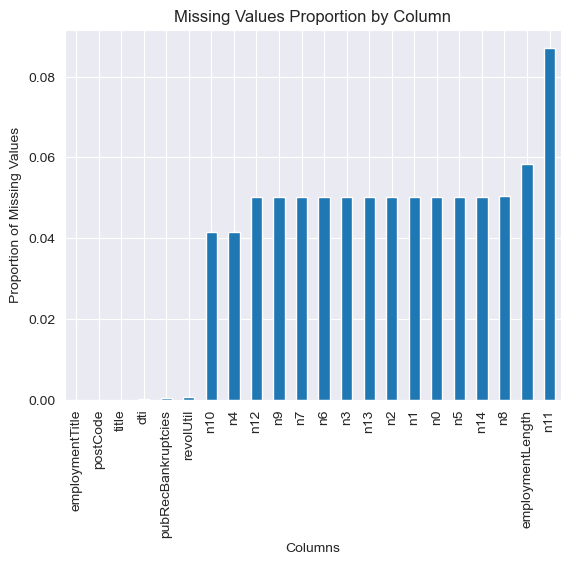

In [24]:
missing = train_data.isnull().sum()/len(train_data)
missing = missing[missing>0]
missing.sort_values(inplace=True)
# 绘制条形图
missing.plot.bar()
plt.title('Missing Values Proportion by Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.show()

查看训练集和测试集唯一值的特征

In [25]:
one_value_features = [col for col in train_data.columns if train_data[col].nunique() <=1 ]

In [26]:
one_value_features

['policyCode']

In [27]:
one_value_features_testA = [col for col in test_data_a if test_data_a[col].nunique() <= 1]

In [28]:
one_value_features_testA

['policyCode']

查看数据类型

In [34]:
# numerical_fea 是一个列表，包含 data_train 中所有非 object 类型的列名（即数值型列）
numerical_fea  = list(train_data.select_dtypes(exclude=['object']).columns)
# 使用 filter 函数和 lambda 表达式来筛选出那些不在 numerical_fea 列表中的列名。
category_fea = list(filter(lambda x: x not in numerical_fea, list(train_data.columns)))

In [35]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [36]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [37]:
train_data.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

In [38]:
# 分离连续型和离散型变量
from utils_jessie import get_numerical_serial_fea
numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(train_data,numerical_fea)

In [39]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [40]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [41]:
train_data['term'].value_counts()

term
3    606902
5    193098
Name: count, dtype: int64

In [42]:
train_data['homeOwnership'].value_counts()

homeOwnership
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: count, dtype: int64

In [43]:
train_data['verificationStatus'].value_counts()

verificationStatus
1    309810
2    248968
0    241222
Name: count, dtype: int64

In [44]:
train_data['initialListStatus'].value_counts()

initialListStatus
0    466438
1    333562
Name: count, dtype: int64

In [45]:
train_data['applicationType'].value_counts()

applicationType
0    784586
1     15414
Name: count, dtype: int64

In [46]:
train_data['policyCode'].value_counts() # 无用，全部一个值

policyCode
1.0    800000
Name: count, dtype: int64

In [47]:
train_data['n11'].value_counts() # 相差悬殊不用分析

n11
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: count, dtype: int64

In [48]:
train_data['n12'].value_counts() #，相差悬殊，用不用再分析

n12
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: count, dtype: int64

连续型数值变量分析

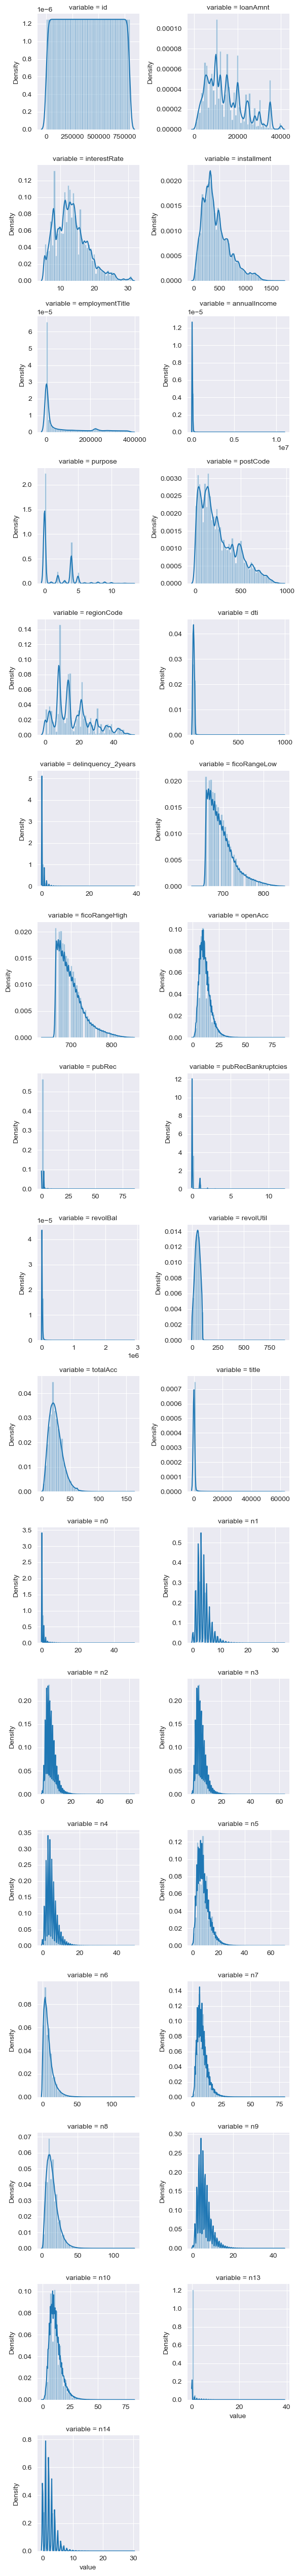

In [49]:
# 每个数字特征分布可视化
f = pd.melt(train_data,value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot,"value")

Text(0, 0.5, 'Probability')

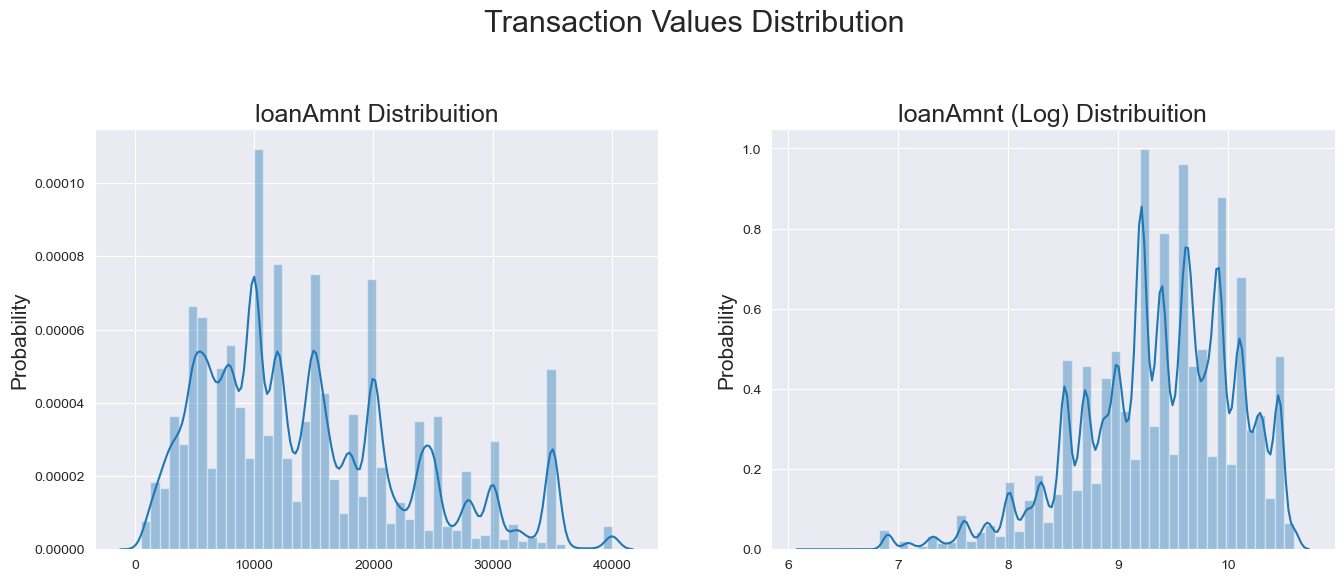

In [50]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(train_data['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(train_data['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

In [51]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [52]:
train_data['grade'].value_counts()

grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64

In [53]:
train_data['subGrade'].value_counts()

subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64

In [54]:
train_data['employmentLength'].value_counts()

employmentLength
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64

In [55]:
train_data['issueDate'].value_counts()

issueDate
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: count, Length: 139, dtype: int64

In [56]:
train_data['earliesCreditLine'].value_counts()

earliesCreditLine
Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: count, Length: 720, dtype: int64

In [57]:
train_data['isDefault'].value_counts()

isDefault
0    640390
1    159610
Name: count, dtype: int64

单一变量分布可视化


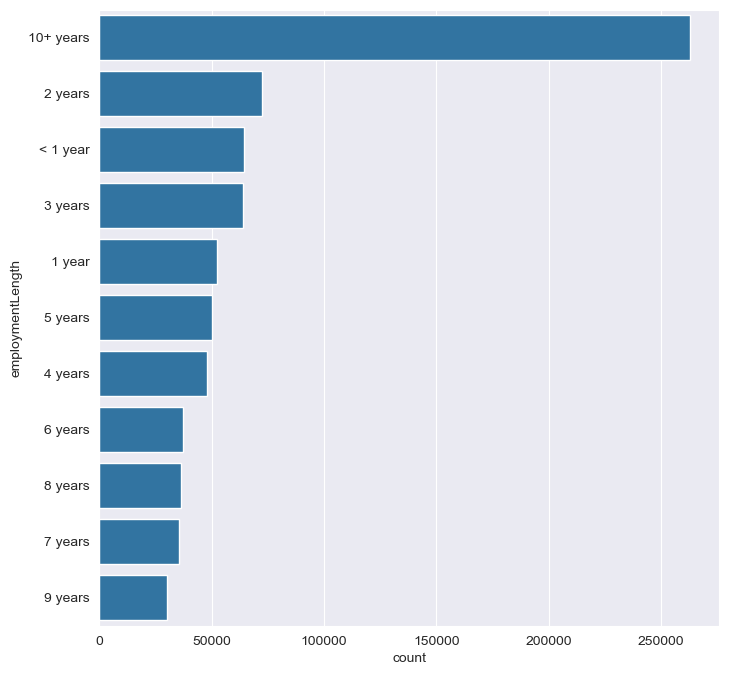

In [59]:
# 假设 data_train 是你的 DataFrame，并且 "employmentLength" 是其中的一列
# 计算 employmentLength 列的值计数并排序
value_counts = train_data["employmentLength"].value_counts(dropna=False)

# 获取前20个值及其计数
top_20_values = value_counts[:20]
top_20_keys = value_counts.keys()[:20]

# 创建一个新的 DataFrame 以便于绘图
df_top_20 = pd.DataFrame({'employmentLength': top_20_keys, 'count': top_20_values}).reset_index(drop=True)

# 创建图形
plt.figure(figsize=(8, 8))

# 使用 Seaborn 绘制条形图
sns.barplot(x='count', y='employmentLength', data=df_top_20, orient='h')

# 显示图形
plt.show()

使用Pandas和Matplotlib来可视化贷款数据集中不同类别（如信用等级grade和工作年限employmentLength）在欺诈(isDefault == 1)与非欺诈(isDefault == 0)样本中的分布情况

In [60]:
train_loan_fr = train_data.loc[train_data['isDefault'] == 1]
train_loan_nofr = train_data.loc[train_data['isDefault'] == 0]

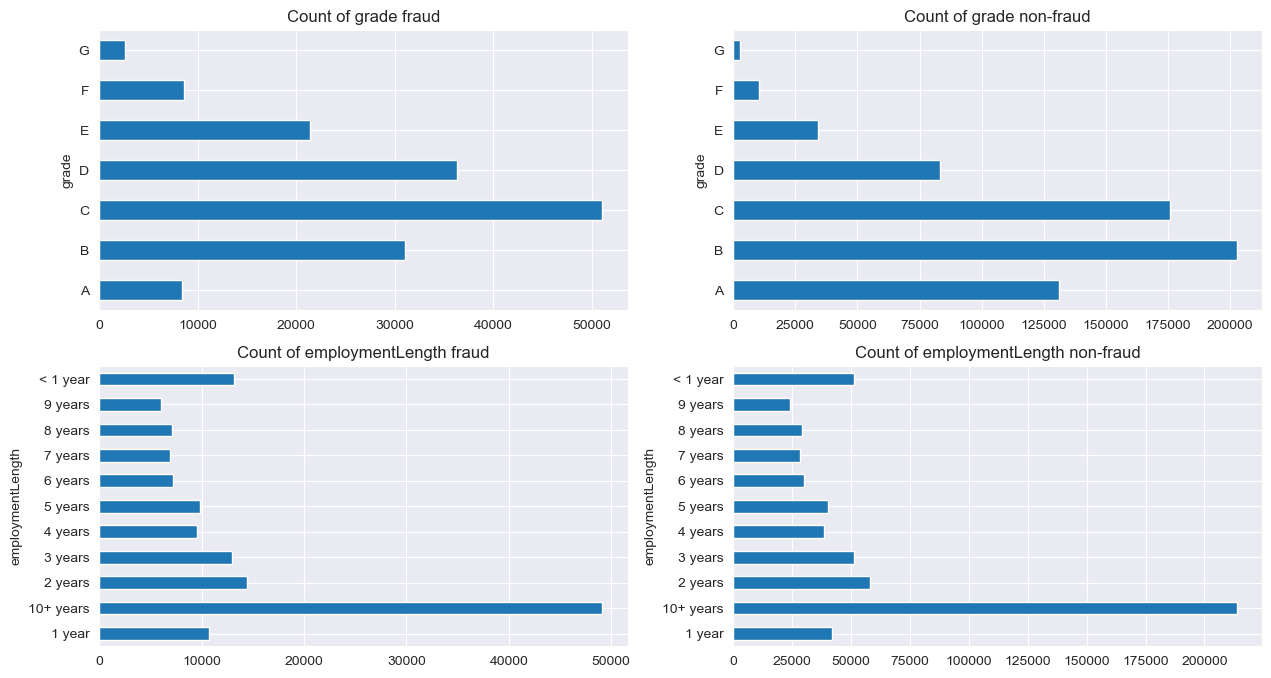

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='Count of grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='Count of grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='Count of employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='Count of employmentLength non-fraud')
plt.show()

<Axes: title={'center': 'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

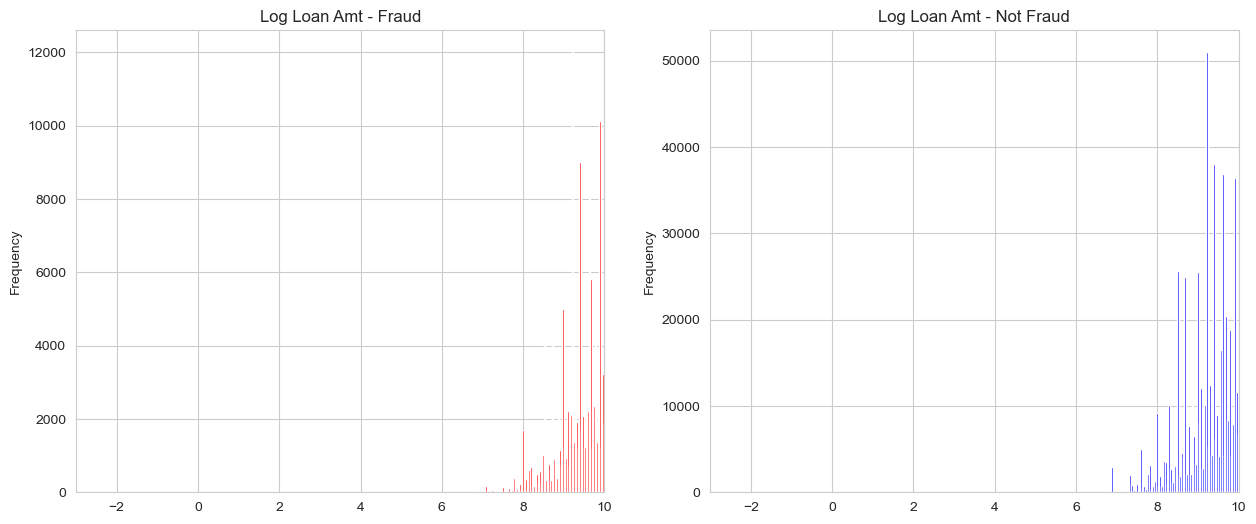

In [63]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
train_data.loc[train_data['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
train_data.loc[train_data['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

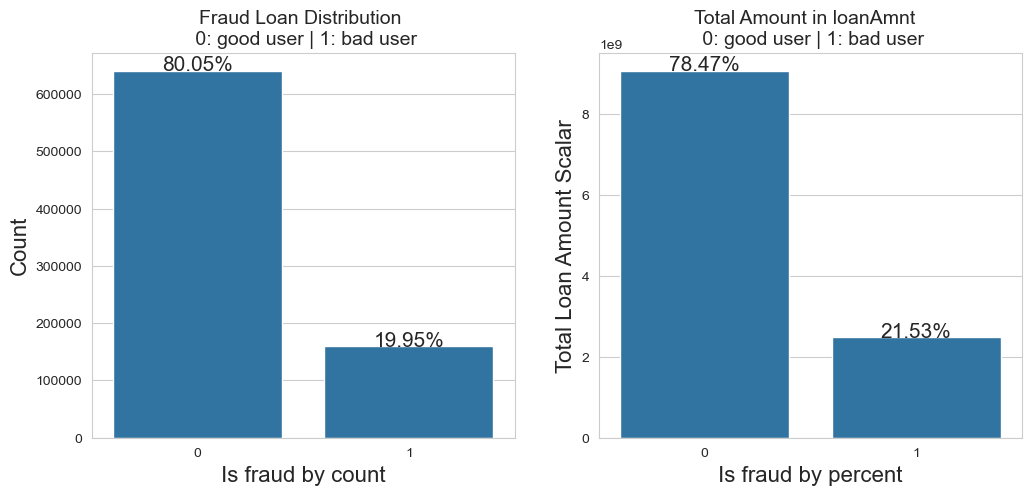

In [64]:
total = len(train_data)
total_amt = train_data.groupby(['isDefault'])['loanAmnt'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=train_data)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15)

percent_amt = (train_data.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)

时间格式数据处理及查看

In [65]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
train_data['issueDate'] = pd.to_datetime(train_data['issueDate'],format='%Y-%m-%d')
start_date = datetime.datetime.strptime('2007-06-01','%Y-%m-%d')  # 将字符串转化为datetime对象
train_data['issueDateDT'] = train_data['issueDate'].apply(lambda x: x-start_date).dt.days

In [66]:
#转化成时间格式
test_data_a['issueDate'] = pd.to_datetime(test_data_a['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
test_data_a['issueDateDT'] = test_data_a['issueDate'].apply(lambda x: x-startdate).dt.days

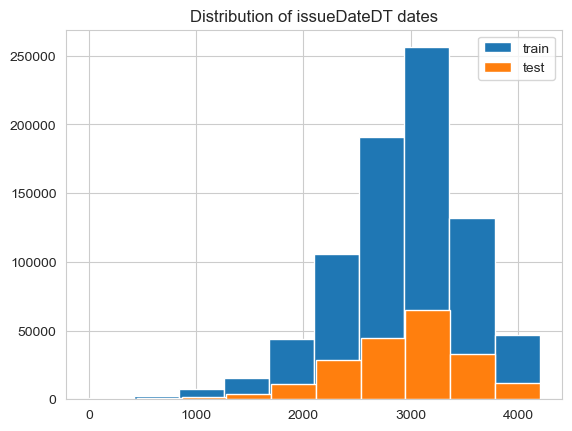

In [67]:
plt.hist(train_data['issueDateDT'], label='train');
plt.hist(test_data_a['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

掌握透视图可以让我们更好的了解数据

In [69]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(train_data,index=['grade'],columns=['issueDateDT'],values=['loanAmnt'],aggfunc=np.sum)

In [70]:
pivot

loanAmnt                                                         \
issueDateDT     0        30       61       92       122      153       183    
grade                                                                         
A                NaN  53650.0  42000.0  19500.0  34425.0  63950.0   43500.0   
B                NaN  13000.0  24000.0  32125.0   7025.0  95750.0  164300.0   
C                NaN  68750.0   8175.0  10000.0  61800.0  52550.0  175375.0   
D                NaN      NaN   5500.0   2850.0  28625.0      NaN  167975.0   
E             7500.0      NaN  10000.0      NaN  17975.0   1500.0   94375.0   
F                NaN      NaN  31250.0   2125.0      NaN      NaN       NaN   
G                NaN      NaN      NaN      NaN      NaN      NaN       NaN   

                                           ...                          \
issueDateDT      214       245       274   ...        3926        3957   
grade                                      ...                           
A            168825.0   85600.0  101825.0  ...  13093850.0  11757325.0   
B            303175.0  434425.0  538450.0  ...  16863100.0  17275175.0   
C            151100.0  243725.0  393150.0  ...  17502375.0  17471500.0   
D            171325.0  192900.0  269325.0  ...  11403075.0  10964150.0   
E            116450.0   42000.0  139775.0  ...   3983050.0   3410125.0   
F             49000.0   27000.0   43000.0  ...   1074175.0    868925.0   
G             24625.0       NaN       NaN  ...     56100.0    243275.0   

                                                                       \
issueDateDT        3987        4018        4048       4079       4110   
grade                                                                   
A            11945975.0   9144000.0   7977650.0  6888900.0  5109800.0   
B            16217500.0  11431350.0   8967750.0  7572725.0  4884600.0   
C            16111225.0  11973675.0  10184450.0  7765000.0  5354450.0   
D            10747675.0   7082050.0   7189625.0  5195700.0  3455175.0   
E             3107150.0   2341825.0   2225675.0  1643675.0  1091025.0   
F              761675.0    685325.0    665750.0   685200.0   316700.0   
G              224825.0     64050.0    198575.0   245825.0    53125.0   

                                              
issueDateDT       4140       4171       4201  
grade                                         
A            3919275.0  2694025.0  2245625.0  
B            4329400.0  3922575.0  3257100.0  
C            4552600.0  2870050.0  2246250.0  
D            3038500.0  2452375.0  1771750.0  
E            1131625.0   883950.0   802425.0  
F             315075.0    72300.0        NaN  
G              23750.0    25100.0     1000.0  

[7 rows x 139 columns]

用pandas_profiling生成数据报告

In [72]:
# import pandas_profiling
from ydata_profiling import ProfileReport

In [73]:
profile = ProfileReport(train_data, title='Task2 Profiling Report')
profile.to_file("your_report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]